In [27]:
%load_ext autoreload
%autoreload 2

import pickle
import copy
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import seaborn as sns

from src.network import Layer
from src.ou_process import ouprocess_gaussian
from src.experiment import Experiment

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
NUM_NEURONS = 200
tau_V = 10
R = 1 # MOhm
EL = -70.0
V_th = -40.0
dt = 0.1 # msec
t_stop = 20.0e3

In [68]:
# Slow Signal: INPUT
input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
i_inj = 16.0 + 6.0*input_slow

In [69]:
layer = Layer(NUM_NEURONS)
layer.train(i_inj=i_inj, exp_output=i_inj, dt=dt, t_stop=t_stop)
out, V, F_binary, F_synaptic = layer.output(i_inj, dt, t_stop)

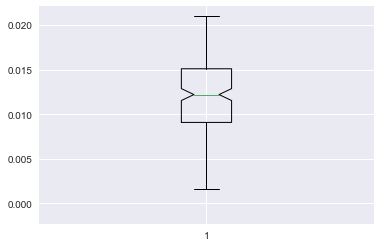

In [70]:
plt.boxplot(layer.W, notch=True, sym="o")
plt.show()

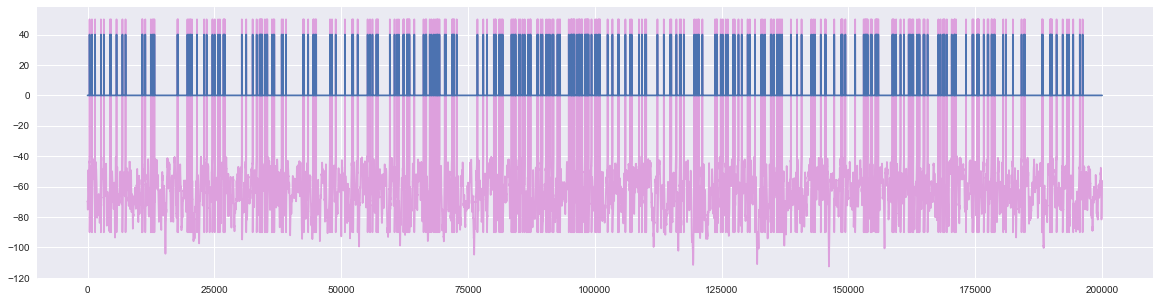

In [71]:
trial = 10
t_i = 0
t_f = -1
plt.figure(figsize=(20,5))
plt.plot(V[t_i:t_f,trial], color='plum')
plt.plot(F_binary[t_i:t_f,trial] * 40.0)
plt.show()

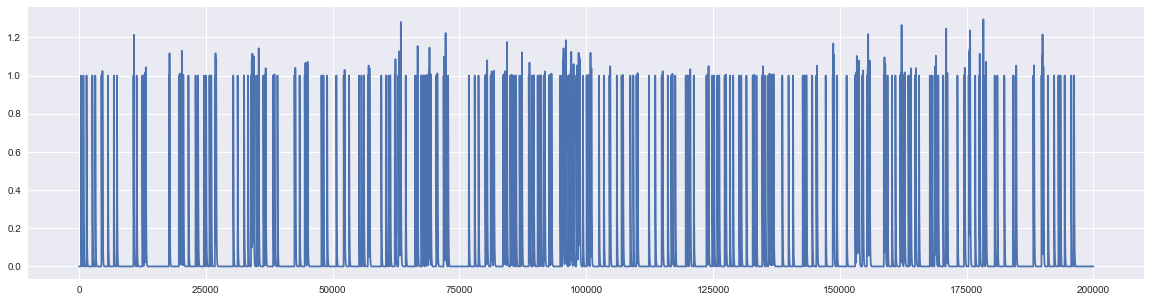

In [72]:
plt.figure(figsize=(20,5))
plt.plot(F_synaptic[:,10])
plt.show()

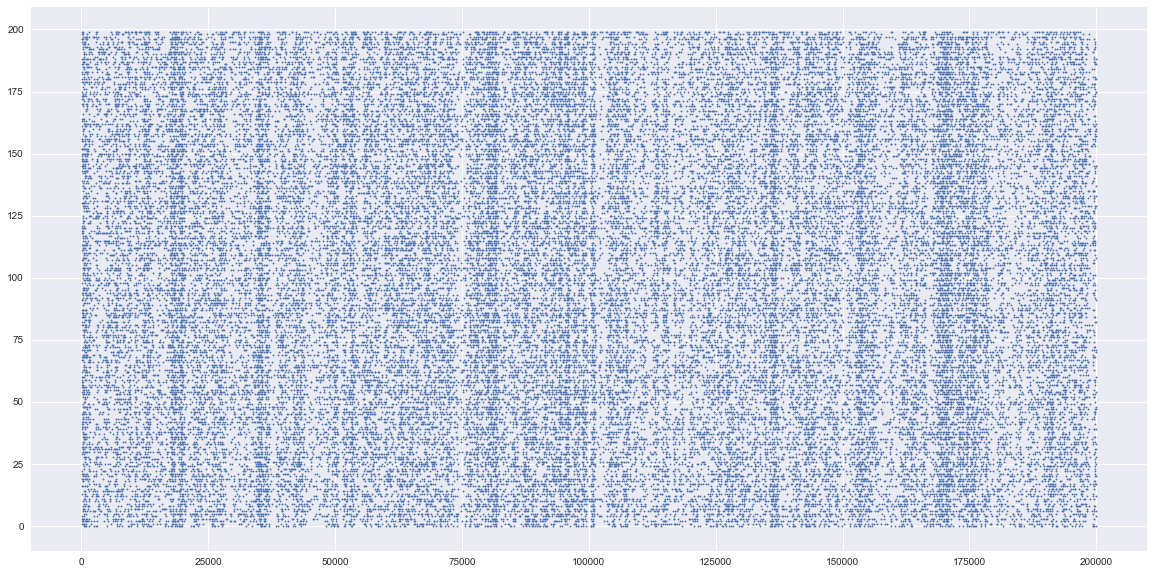

In [73]:
spike_inds, spike_trial = np.where(F_binary > 0)
plt.figure(figsize=(20,10))
plt.scatter(spike_inds, spike_trial, s=2)
plt.show()

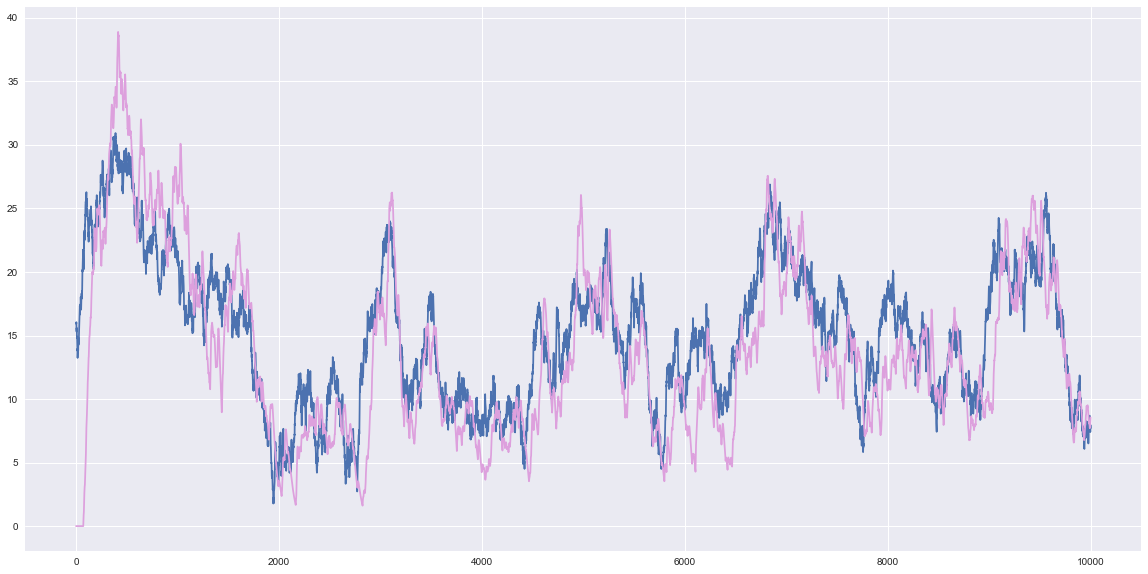

In [74]:
plt.figure(figsize=(20,10))
plt.plot(i_inj[:10000])
plt.plot(out[:10000], 'plum')
plt.show()

In [75]:
np.linalg.norm(out-i_inj)

1743.6412714354367

In [77]:
LOAD_EXP_1 = False
load_exp1_file = "exp1__neurons=200__trials=100__input=tau_50_same.pkl"

if LOAD_EXP_1:
    experiment = pickle.load(open(load_exp1_file, 'rb'))
else:
    NUM_TRIALS = 100

    num_t = np.arange(0.0, t_stop, dt).shape[0]
    inputs = np.empty((num_t, NUM_TRIALS))
    
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    for i in range(NUM_TRIALS):
        inputs[:,i] = i_inj.flatten()

    experiment = Experiment(inputs, layer, NUM_TRIALS, dt, t_stop)
    spikes = experiment.run()
    with open(load_exp1_file, 'wb') as pickle_out:  
        pickle.dump(experiment, pickle_out)

Trial  0
10 Iter time:  69.4861466884613
Total time:  69.50603008270264




KeyboardInterrupt: 

In [ ]:
plt.hist(l2_norms, bins=20)
plt.show()

In [ ]:
plt.boxplot(l2_norms, notch=True, sym="o")
plt.show()

In [10]:
LOAD_EXP_3 = True
load_exp1_file = "1000_neurons_200_trials_input=tau_50_regenerated.pkl"

In [11]:
if LOAD_EXP_1:
    experiment = pickle.load(open(load_exp1_file, 'rb'))
else:
    NUM_TRIALS = 200

    num_t = np.arange(0.0, t_stop, dt).shape[0]
    inputs = np.empty((num_t, NUM_TRIALS))

    for i in range(NUM_TRIALS):
        input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
        i_inj = 16.0 + 6.0*input_slow
        inputs[:,i] = i_inj.flatten()

    experiment = Experiment(inputs, layer, NUM_TRIALS, dt, t_stop)
    spikes = experiment.run()
    with open("1000_neurons_200_trials_input=tau_50_regenerated.pkl", 'wb') as pickle_out:  
        pickle.dump(experiment, pickle_out)

In [12]:
l2_norms = np.empty((experiment.num_trials))

for i in range(experiment.num_trials):
    l2_norms[i] = np.linalg.norm(experiment.outputs[:, i]-experiment.inputs[:, i])

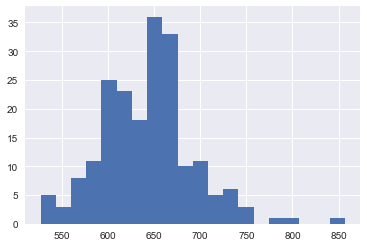

In [21]:
plt.hist(l2_norms, bins=20)
plt.show()

In [ ]:
plt.boxplot(l2_norms, notch=True, sym="o")
plt.show()

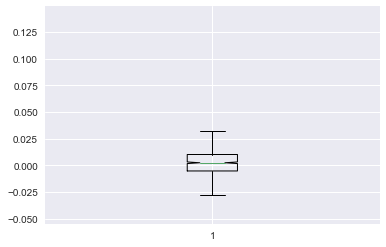

In [23]:
# EXPERIMENT 2: Shuffle weights, how does this affect reconstruction?
# layer_shuffle = copy.deepcopy(experiment.layer)



each presynaptic spike through synaptic waveform * 

In [ ]:
# EXPERIMENT 3: Sweep Tau = 30--50
NUM_TRIALS = 200

num_t = np.arange(0.0, t_stop, dt).shape[0]
inputs = np.empty((num_t, NUM_TRIALS))

for i in range(NUM_TRIALS):
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    inputs[:,i] = i_inj.flatten()